In [88]:
import pandas as pd
df = pd.read_csv(r"D:\data_set_for_deepLearning\wtbdata_245days.csv") #,header = None,nrows = 5

#change time to float
def time_of_day(x):
    return (int(x[:2])+int(x[3:])/60)
df["Tmstamp"]=df["Tmstamp"].astype(str).apply(time_of_day,2) 

#Sum_2days_Patv
df['Sum_2days_Patv'] = df['Patv'].cumsum()
df['Sum_2days_Patv']=df['Sum_2days_Patv'][288:].reset_index(drop=True)-df['Sum_2days_Patv'][:-288].reset_index(drop=True)

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
print("正在划分数据集")
df=df.iloc[1:,:] #第一行很多NAN
df=df.iloc[:-288,:]#去除最后的尾巴NAN
y=df['Sum_2days_Patv']
X=df.iloc[:,:-1]

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=17)

正在划分数据集


In [90]:
df

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,Sum_2days_Patv
1,1,1,0.166667,6.17,-3.99,30.73,41.80,25.92,1.00,1.00,1.00,-0.25,494.66,198862.920000
2,1,1,0.333333,6.27,-2.18,30.60,41.63,20.91,1.00,1.00,1.00,-0.24,509.76,199852.170000
3,1,1,0.500000,6.42,-0.73,30.52,41.52,20.91,1.00,1.00,1.00,-0.26,542.53,200853.280000
4,1,1,0.666667,6.25,0.89,30.49,41.38,20.91,1.00,1.00,1.00,-0.23,509.36,201848.150000
5,1,1,0.833333,6.10,-1.03,30.47,41.22,20.91,1.00,1.00,1.00,-0.27,482.21,202866.390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727227,134,243,23.166667,10.98,-1.96,-5.11,-0.67,345.57,8.82,8.82,8.82,136.49,1152.60,159075.250002
4727228,134,243,23.333333,11.82,-3.18,-5.46,-0.54,345.57,13.87,13.87,13.87,84.43,681.65,159067.390002
4727229,134,243,23.500000,11.91,-1.42,-5.21,-0.42,345.57,10.69,10.69,10.69,145.72,1118.35,158948.400002
4727230,134,243,23.666667,11.86,-0.95,-5.40,-0.38,345.57,13.94,13.94,13.94,89.56,683.49,159365.800002


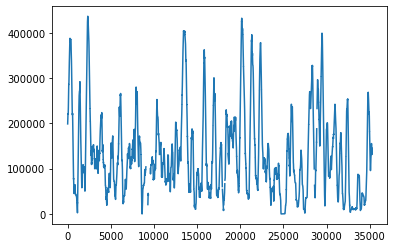

In [151]:
import matplotlib.pyplot as plt
x=list(df.iloc[:int(4727231/134),13])
y=np.arange(len(x))
plt.plot(y,x)

In [91]:
df['Day'].unique() #一共245天数 

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [92]:
import lightgbm as lgb

# 创建成lgb特征的数据集格式
lgb_train = lgb.Dataset(train_X, train_y)
lgb_eval = lgb.Dataset(test_X, test_y, reference=lgb_train)

In [93]:
# 将参数写成字典下形式
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression', # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,   # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1 # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

print('Start training...')
# 训练 cv and train
gbm = lgb.train(params,lgb_train,num_boost_round=20,valid_sets=lgb_eval,early_stopping_rounds=5)


Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3074
[LightGBM] [Info] Number of data points in the train set: 3309061, number of used features: 13
[LightGBM] [Info] Start training from score 98574.715652
[1]	valid_0's l2: 4.72949e+09	valid_0's auc: 0.738508
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 4.55412e+09	valid_0's auc: 0.751476
[3]	valid_0's l2: 4.37896e+09	valid_0's auc: 0.749898
[4]	valid_0's l2: 4.23358e+09	valid_0's auc: 0.754859
[5]	valid_0's l2: 4.0801e+09	valid_0's auc: 0.753272
[6]	valid_0's l2: 3.92894e+09	valid_0's auc: 0.755633
[7]	valid_0's l2: 3.81475e+09	valid_0's auc: 0.777335
[8]	valid_0's l2: 3.70752e+09	valid_0's auc: 0.777812
[9]	valid_0's l2: 3.59651e+09	valid_0's auc: 0.777166
[10]	valid_0's l2: 3.48157e+09	valid_0's auc: 0.773502
[11]	valid_0's l2: 3.37605e+09	

In [97]:
#查看相对误差
(gbm.predict(test_X, num_iteration=gbm.best_iteration)-test_y)/test_y

368797    -0.396325
3885432    0.575354
1136982   -0.577361
2243701    1.672583
788650    -0.451062
             ...   
601765     1.332846
2743718    0.525136
1571321   -0.096510
733381     1.972341
1139964    0.330156
Name: Sum_2days_Patv, Length: 1418170, dtype: float64

In [119]:
a.reset_index(drop=True)

0         -0.396325
1          0.575354
2         -0.577361
3          1.672583
4         -0.451062
             ...   
1389336    1.332846
1389337    0.525136
1389338   -0.096510
1389339    1.972341
1389340    0.330156
Name: Sum_2days_Patv, Length: 1389341, dtype: float64

In [133]:
a=((gbm.predict(test_X, num_iteration=gbm.best_iteration)-test_y)/test_y).dropna(how='all')
a=a.reset_index(drop=True)
a

0         -0.396325
1          0.575354
2         -0.577361
3          1.672583
4         -0.451062
             ...   
1389336    1.332846
1389337    0.525136
1389338   -0.096510
1389339    1.972341
1389340    0.330156
Name: Sum_2days_Patv, Length: 1389341, dtype: float64

$∑_i Patv_i$